# Importing all the Dependencies
* Not all calculations and graphs presented in the notebook were used in the presentation
* Items were trimmed to meet the 6-8 graph and 10 minute presentation limits
* Items trimmed are included at the end of the notebook

In [2]:
#matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
from config import gkey
import matplotlib.pyplot as plt
import gmaps
import requests
import json
from scipy import stats

Data_Files =pd.read_csv("survey_results_public.csv", encoding ='utf-8')

gmaps.configure(api_key=gkey)

GOOGLE_MAPS_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json?'

Data_Files.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Age Demographics

* Categorized the existing developers using age bins
* Calculated the numbers and percentages by age group
* Created a summary data frame to hold the results


In [33]:
Age_Gender_DF = Data_Files.loc[:,["Country","Gender","Age"]]
Age_Gender_DF["Age"]= Age_Gender_DF["Age"].replace({"25 - 34 years old":"25-34","18 - 24 years old":"18 - 24","35 - 44 years old":"35 - 44","45 - 54 years old":"45 - 54","Under 18 years old":"< 18","55 - 64 years old":"55 - 64","65 years or older":"> 65"})
Age_Gender_DF["Age"].value_counts()
Age_Gender_DF.head()

,Country,Gender,Age
0,Kenya,Male,25-34
1,United Kingdom,Male,35 - 44
2,United States,NaN,NaN
3,United States,Male,35 - 44
4,South Africa,Male,18 - 24


* Data Cleaning for Gender Demographics

* Cleaned Gender Column to just Three Gender Groups: Male, Female, Other / Non-Disclosed

* Rounded the percentage column to two decimal points

* Display Age Demographics Table

In [34]:
Age_Gender_DF["Gender"]=Age_Gender_DF["Gender"].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})
Count_Gender= Age_Gender_DF["Gender"].value_counts()
Gender_df=pd.DataFrame(Count_Gender)
Tot= Count_Gender.sum()
Gender_df["Percentage Of Developers"]=round(Count_Gender*100/Tot,2)
Gender_df

,Gender,Percentage Of Developers
Male,59620,92.48
Female,4244,6.58
Other / Non-Disclosed,605,0.94


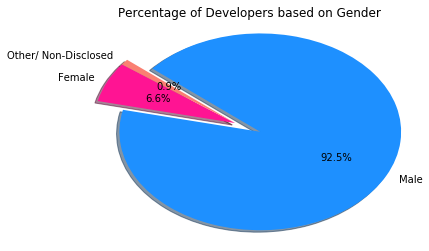

In [35]:
Labels= ["Male","Female","Other/ Non-Disclosed"]
Sizes =Gender_df["Percentage Of Developers"].values
colors = ["dodgerblue", "deeppink", "salmon"]
explode = (0.2, 0, 0)
plt.pie(Sizes, explode=explode, labels=Labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,counterclock=False,pctdistance =0.6)
plt.title("Percentage of Developers based on Gender")
plt.axis("normal")

plt.savefig("../Images/Gender_Percentage.png")
plt.show()

# Gender Demographics

* Created DataFrame to Analyze Gender Demographics using Country, Age Group, Gender

* Cleaned the Data to Remove NAs

In [36]:
Age_Gender_DF =Age_Gender_DF.dropna()
Age_Gender_DF["Age"].value_counts()

25-34      31203
18 - 24    14956
35 - 44    11276
45 - 54     3243
< 18        1596
55 - 64      937
> 65         171
Name: Age, dtype: int64

# DataFrames by Gender and Age Group

In [37]:
Age_Male_DF=Age_Gender_DF.loc[Age_Gender_DF["Gender"]=="Male",:]
Male_Age = Age_Male_DF["Age"].value_counts()
Male_Age_df = pd.DataFrame({"Gender":"Male","Number Of Developers": Male_Age})
Male_Age_df["Percentage of Developers"]=round(Male_Age_df["Number Of Developers"]*100/Male_Age_df["Number Of Developers"].sum(),2)
Male_Age_df

,Gender,Number Of Developers,Percentage of Developers
25-34,Male,28756,49.02
18 - 24,Male,13651,23.27
35 - 44,Male,10660,18.17
45 - 54,Male,3056,5.21
< 18,Male,1505,2.57
55 - 64,Male,877,1.50
> 65,Male,153,0.26


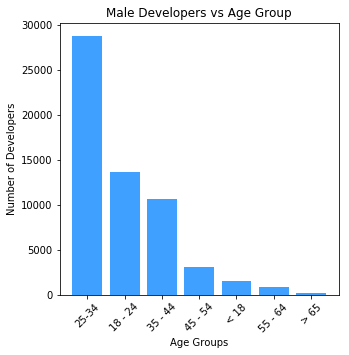

In [38]:
plt.figure(figsize=(5,5))
x_axis_male=Male_Age_df.index.values
plt.bar(x_axis_male, Male_Age_df["Number Of Developers"], align='center', alpha=0.85, color ="dodgerblue")
plt.title("Male Developers vs Age Group")
plt.xlabel("Age Groups")
plt.xticks(rotation=45)
plt.ylabel("Number of Developers")
plt.savefig("../Images/Male Developers vs Age Group.png")
plt.show()

In [39]:
Age_Female_DF=Age_Gender_DF.loc[Age_Gender_DF["Gender"]=="Female",:]
Female_Age = Age_Female_DF["Age"].value_counts()
Female_Age_df = pd.DataFrame({"Gender":"Female","Number Of Developers": Female_Age})
Female_Age_df["Percentage of Developers"]=round(Female_Age_df["Number Of Developers"]*100/Female_Age_df["Number Of Developers"].sum(),2)
Female_Age_df

,Gender,Number Of Developers,Percentage of Developers
25-34,Female,2189,52.81
18 - 24,Female,1117,26.95
35 - 44,Female,557,13.44
45 - 54,Female,168,4.05
< 18,Female,54,1.30
55 - 64,Female,52,1.25
> 65,Female,8,0.19


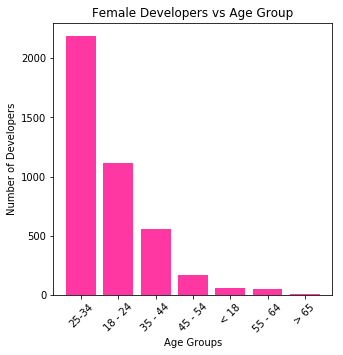

In [40]:
plt.figure(figsize=(5,5))
x_axis_female=Female_Age_df.index.values
plt.bar(x_axis_female, Female_Age_df["Number Of Developers"], align='center', alpha=0.85,color= "deeppink")
plt.title("Female Developers vs Age Group")
plt.xlabel("Age Groups")
plt.xticks(rotation=45)
plt.ylabel("Number of Developers")
plt.savefig("../Images/Female Developers vs Age Group.png")
plt.show()

In [41]:
Age_Other_DF=Age_Gender_DF.loc[Age_Gender_DF["Gender"]=="Other / Non-Disclosed",:]
Other_Age = Age_Other_DF["Age"].value_counts()
Other_Age_df = pd.DataFrame({"Gender":"Other / Non-Disclosed","Number Of Developers": Other_Age})
Other_Age_df["Percentage of Developers"]=round(Other_Age_df["Number Of Developers"]*100/Other_Age_df["Number Of Developers"].sum(),2)

Other_Age_df

,Gender,Number Of Developers,Percentage of Developers
25-34,Other / Non-Disclosed,258,44.56
18 - 24,Other / Non-Disclosed,188,32.47
35 - 44,Other / Non-Disclosed,59,10.19
< 18,Other / Non-Disclosed,37,6.39
45 - 54,Other / Non-Disclosed,19,3.28
> 65,Other / Non-Disclosed,10,1.73
55 - 64,Other / Non-Disclosed,8,1.38


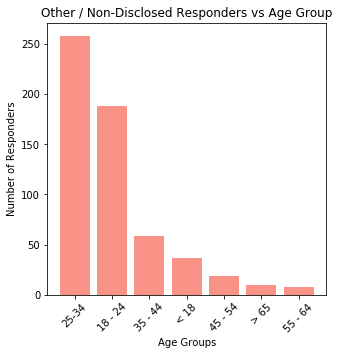

In [42]:
plt.figure(figsize=(5,5))
x_axis=Other_Age_df.index.values
plt.bar(x_axis, Other_Age_df["Number Of Developers"], align='center', alpha=0.85,color= "salmon")
plt.title("Other / Non-Disclosed Responders vs Age Group")
plt.xlabel("Age Groups")
plt.xticks(rotation=45)
plt.ylabel("Number of Responders")
plt.savefig("../Images/Other-Non-Disclosed Responders vs Age Group.png")
plt.show()

Text(2.5, 0.5, 'Number of Developers')

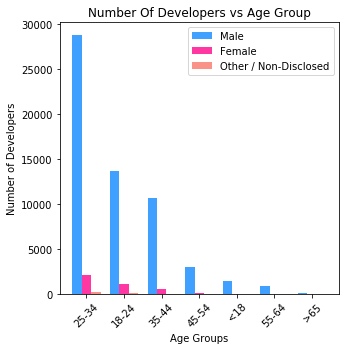

In [43]:
x_axis = np.arange(7)
plt.figure(figsize=(5,5))
bar_width = 0.25
opacity = 0.8
male_plot = plt.bar(x_axis, Male_Age_df["Number Of Developers"],bar_width, align='center', alpha=0.85, color ="dodgerblue", Label ="Male")
female_plot =plt.bar(x_axis+bar_width, Female_Age_df["Number Of Developers"],bar_width, align='center', alpha=0.85,color= "deeppink", Label="Female")
Others_plot=plt.bar(x_axis+bar_width+bar_width, Other_Age_df["Number Of Developers"], bar_width,align='center', alpha=0.85,color= "salmon",Label="Other / Non-Disclosed")
plt.title("Number Of Developers vs Age Group")
plt.xlabel("Age Groups")
#plt.ylim(0,500)
plt.xticks(x_axis + bar_width, ("25-34","18-24","35-44","45-54","<18","55-64",">65"),rotation=45)
plt.legend((male_plot,female_plot,Others_plot),("Male","Female","Other / Non-Disclosed"))
plt.savefig("../Images/Number Of Developers vs Age Group.png")
plt.ylabel("Number of Developers")

In [44]:
Age_Gender_DF.head()

,Country,Gender,Age
0,Kenya,Male,25-34
1,United Kingdom,Male,35 - 44
3,United States,Male,35 - 44
4,South Africa,Male,18 - 24
5,United Kingdom,Male,18 - 24


# Female DataFrame

In [45]:
Demographics_Female = Age_Gender_DF.loc[(Age_Gender_DF["Gender"]=="Female"),:]
Demographics_Female.reset_index(level=0, inplace=True)
Female_Responders=  Demographics_Female["Country"].value_counts()
df_Female=pd.DataFrame(Female_Responders)
df_Female=df_Female.drop("Other Country (Not Listed Above)", axis=0)
df_Female["Gender"]="Female"
df_Female.reset_index(level=0, inplace=True)
df_Female=df_Female.rename(columns = {"index":"Country","Country": "Number Of Developers"})
df_Female["Longitude"]=""
df_Female["Latitude"]=""
    
for index, row in df_Female.iterrows():
    address = row['Country']
    params = {'address': address,'key':gkey}
    Response= requests.get(GOOGLE_MAPS_API_URL, params=params).json()
    df_Female.loc[index, 'Longitude']=Response["results"][0]["geometry"]["location"]["lng"]
    df_Female.loc[index, 'Latitude']=Response["results"][0]["geometry"]["location"]["lat"]

In [46]:
df_Female.head()

,Country,Number Of Developers,Gender,Longitude,Latitude
0,United States,1385,Female,-95.7129,37.0902
1,India,407,Female,78.9629,20.5937
2,United Kingdom,278,Female,-3.43597,55.3781
3,Canada,217,Female,-106.347,56.1304
4,Germany,202,Female,10.4515,51.1657


In [47]:
locations = df_Female[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = df_Female["Number Of Developers"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10, point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Male DataFrame

In [48]:
Demographics_Male = Age_Gender_DF.loc[(Age_Gender_DF["Gender"]=="Male"),:]
Demographics_Male.reset_index(level=0, inplace=True)
Male_Responders=  Demographics_Male["Country"].value_counts()
df_Male=pd.DataFrame(Male_Responders)
df_Male=df_Male.drop("Other Country (Not Listed Above)", axis=0)
df_Male["Gender"]="Male"
df_Male.reset_index(level=0, inplace=True)
df_Male=df_Male.rename(columns = {"index":"Country","Country": "Number Of Developers"})
df_Male["Longitude"]=""
df_Male["Latitude"]=""
for index, row in df_Male.iterrows():
    address = row['Country']
    params = {'address': address,'key':gkey}
    Response= requests.get(GOOGLE_MAPS_API_URL, params=params).json()
    df_Male.loc[index, 'Longitude']=Response["results"][0]["geometry"]["location"]["lng"]
    df_Male.loc[index, 'Latitude']=Response["results"][0]["geometry"]["location"]["lat"]


In [49]:
df_Male.head()

,Country,Number Of Developers,Gender,Longitude,Latitude
0,United States,13787,Male,-95.7129,37.0902
1,India,5973,Male,78.9629,20.5937
2,United Kingdom,4223,Male,-3.43597,55.3781
3,Germany,4159,Male,10.4515,51.1657
4,Canada,2179,Male,-106.347,56.1304


In [50]:
locations = df_Male[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = df_Male["Number Of Developers"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Other/Not Defined

In [51]:
Demographics_Other = Age_Gender_DF.loc[(Age_Gender_DF["Gender"]=="Other / Non-Disclosed"),:]
Demographics_Other.reset_index(level=0, inplace=True)
Other_Responders=  Demographics_Other["Country"].value_counts()
df_Other=pd.DataFrame(Other_Responders)
df_Other=df_Other.drop("Other Country (Not Listed Above)", axis=0)
df_Other["Gender"]="Other / Non-Disclosed"
df_Other.reset_index(level=0, inplace=True)
df_Other=df_Other.rename(columns = {"index":"Country","Country": "Number Of Developers"})
df_Other["Longitude"]=""
df_Other["Latitude"]=""

In [52]:
for index, row in df_Other.iterrows():
    address = row['Country']
    params = {'address': address,'key':gkey}
    Response= requests.get(GOOGLE_MAPS_API_URL, params=params).json()
    df_Other.loc[index, 'Longitude']=Response["results"][0]["geometry"]["location"]["lng"]
    df_Other.loc[index, 'Latitude']=Response["results"][0]["geometry"]["location"]["lat"]
df_Other.head()

,Country,Number Of Developers,Gender,Longitude,Latitude
0,United States,167,Other / Non-Disclosed,-95.7129,37.0902
1,India,54,Other / Non-Disclosed,78.9629,20.5937
2,United Kingdom,48,Other / Non-Disclosed,-3.43597,55.3781
3,Germany,43,Other / Non-Disclosed,10.4515,51.1657
4,Canada,27,Other / Non-Disclosed,-106.347,56.1304


In [53]:
locations = df_Other[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = df_Other["Number Of Developers"].astype(float)
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Data Cleaning
* Cleaned up the following fields by shortening labels in Formal_Education and Undergraduated Majors. Also bucked Gender into 3 categories.  
* NAs were removed as needed

In [31]:
Education_df = Data_Files

# Shortening formal education labels

Education_df['FormalEducation'] = Education_df['FormalEducation'].replace({"Professional degree (JD, MD, etc.)": "Professional Degree",
                                                                          "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor’s Degree",
                                                                          "Master’s degree (MA, MS, M.Eng., MBA, etc.)" : "Master's Degree",
                                                                        "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary School",
                                                                           "Associate degree" : "Associate Degree",
                                                                          "Other doctoral degree (Ph.D, Ed.D., etc.)": "Other Doctoral Degree", 
                                                                           "I never completed any formal education": "Never Completed Any Formal Education",
                                                                          "Primary/elementary school": "Elementary school",
                                                                          "Some college/university study without earning a degree":"Some College/University Study"})

Education_df['FormalEducation'].value_counts()

Bachelor’s Degree                       43659
Master's Degree                         21396
Some College/University Study           11710
Secondary School                         8951
Associate Degree                         2970
Other Doctoral Degree                    2214
Elementary school                        1656
Professional Degree                      1447
Never Completed Any Formal Education      700
Name: FormalEducation, dtype: int64

In [30]:
# Shortening undergrad major labels

Education_df['UndergradMajor'] = Education_df['UndergradMajor'].replace({"A health science (ex. nursing, pharmacy, radiology)": "Health Science",
                                                                          "Fine arts or performing arts (ex. graphic design, music, studio art)": "Fine Arts/Performing Arts",
                                                                          "A social science (ex. anthropology, psychology, political science)" : "Social Science",
                                                                        "A humanities discipline (ex. literature, history, philosophy)":"Humanities Discipline",
                                                                           "A business discipline (ex. accounting, finance, marketing)" : "Business Discipline",
                                                                          "Mathematics or statistics": "Mathematics or statistics", 
                                                                           "A natural science (ex. biology, chemistry, physics)": "Natural Science",
                                                                          "Information systems, information technology, or system administration": "Information Systems/Information Technology",
                                                                          "Another engineering discipline (ex. civil, electrical, mechanical)":"Another Engineering Discipline",
                                                                        "Computer science, computer engineering, or software engineering": "Computer Science/Computer Engineering"})

Education_df['UndergradMajor'].value_counts()

Computer Science/Computer Engineering         50336
Another Engineering Discipline                 6945
Information Systems/Information Technology     6507
Natural Science                                3050
Mathematics or statistics                      2818
Web development or web design                  2418
Business Discipline                            1921
Humanities Discipline                          1590
Social Science                                 1377
Fine Arts/Performing Arts                      1135
I never declared a major                        693
Health Science                                  246
Name: UndergradMajor, dtype: int64

In [33]:
# Shortening gender labels

Education_df['Gender'] = Education_df['Gender'].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})

Education_df['Gender'].value_counts()

Male                     59620
Female                    4244
Other / Non-Disclosed      605
Name: Gender, dtype: int64

# Formal Education

In [34]:
FE_Gender_df_temp = Education_df.loc[:,["FormalEducation","Gender","Respondent"]]
FE_Gender_df = FE_Gender_df_temp.dropna()
FE_Gender_df["FormalEducation"].count()

Count_Gender= FE_Gender_df["Gender"].value_counts()
Gender_df=pd.DataFrame(Count_Gender)
Tot= Count_Gender.sum()
Gender_df["Percentage Of Developers"]=round(Count_Gender*100/Tot,2)

Gender_df

,Gender,Percentage Of Developers
Male,58603,92.51
Female,4157,6.56
Other / Non-Disclosed,586,0.93


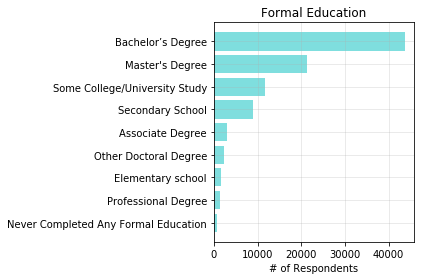

Total Formal Education responses: 94703


,Labels,Values,% of Respondents
Bachelor’s Degree,Bachelor’s Degree,43659,46.10
Master's Degree,Master's Degree,21396,22.59
Some College/University Study,Some College/University Study,11710,12.36
Secondary School,Secondary School,8951,9.45
Associate Degree,Associate Degree,2970,3.14
Other Doctoral Degree,Other Doctoral Degree,2214,2.34
Elementary school,Elementary school,1656,1.75
Professional Degree,Professional Degree,1447,1.53
Never Completed Any Formal Education,Never Completed Any Formal Education,700,0.74


In [37]:
formaleducation_temp = Education_df[['Respondent','FormalEducation']]
formaleducation = formaleducation_temp.dropna()

formaleducation_count = formaleducation['FormalEducation'].value_counts()
Per_Total = round(((formaleducation_count/formaleducation_count.sum())*100),2)

formaleducation_df = pd.DataFrame({'Labels' : formaleducation_count.index,
                            'Values' : formaleducation_count.values,
                             "% of Respondents" : Per_Total      
})

plt.barh(formaleducation_df['Labels'], formaleducation_df['Values'], color='c', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Formal Education")
plt.xlabel("# of Respondents")
plt.tight_layout()
plt.savefig("../Images/Formal_Education.png")
plt.show()

print(f"Total Formal Education responses: {formaleducation_count.sum()}")

formaleducation_df

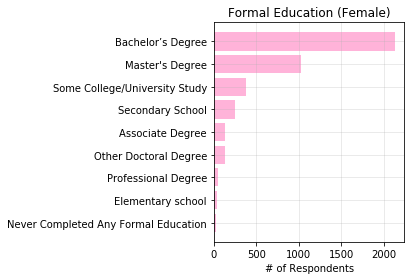

Total Formal Education responses: 4157


,Labels,Female_Values,% of Respondents
Bachelor’s Degree,Bachelor’s Degree,2140,51.48
Master's Degree,Master's Degree,1028,24.73
Some College/University Study,Some College/University Study,383,9.21
Secondary School,Secondary School,244,5.87
Associate Degree,Associate Degree,133,3.20
Other Doctoral Degree,Other Doctoral Degree,126,3.03
Professional Degree,Professional Degree,46,1.11
Elementary school,Elementary school,36,0.87
Never Completed Any Formal Education,Never Completed Any Formal Education,21,0.51


In [38]:
FE_Female_df_temp = FE_Gender_df.loc[FE_Gender_df["Gender"]=="Female",:]
FE_Female_df = FE_Female_df_temp.dropna()

FE_Female_df_count = FE_Female_df['FormalEducation'].value_counts()
Per_Female = round(((FE_Female_df_count/FE_Female_df_count.sum())*100),2)

FE_Female_df = pd.DataFrame({'Labels' : FE_Female_df_count.index,
                            'Female_Values' : FE_Female_df_count.values,
                             "% of Respondents" : Per_Female
})

plt.barh(FE_Female_df['Labels'],FE_Female_df['Female_Values'], color='hotpink', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Formal Education (Female)")
plt.xlabel("# of Respondents")
plt.tight_layout()
# plt.savefig("Images/Formal_Education_Female.png")
plt.show()

print(f"Total Formal Education responses: {FE_Female_df_count.sum()}")

FE_Female_df

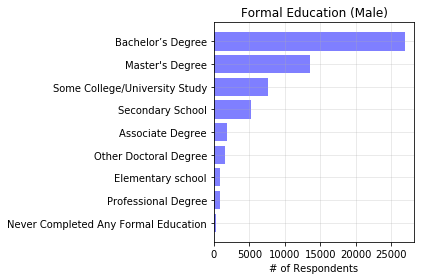

Total Formal Education responses: 58603


,Labels,Male_Values,% of Respondents
Bachelor’s Degree,Bachelor’s Degree,26876,45.86
Master's Degree,Master's Degree,13488,23.02
Some College/University Study,Some College/University Study,7679,13.10
Secondary School,Secondary School,5262,8.98
Associate Degree,Associate Degree,1817,3.10
Other Doctoral Degree,Other Doctoral Degree,1562,2.67
Elementary school,Elementary school,854,1.46
Professional Degree,Professional Degree,806,1.38
Never Completed Any Formal Education,Never Completed Any Formal Education,259,0.44


In [39]:
FE_Male_df_temp = FE_Gender_df.loc[FE_Gender_df["Gender"]=="Male",:]
FE_Male_df = FE_Male_df_temp.dropna()

FE_Male_df_count = FE_Male_df['FormalEducation'].value_counts()
Per_Male = round(((FE_Male_df_count/FE_Male_df_count.sum())*100),2)


FE_Male_df = pd.DataFrame({'Labels' : FE_Male_df_count.index,
                            'Male_Values' : FE_Male_df_count.values,
                           "% of Respondents" : Per_Male
                           
})

plt.barh(FE_Male_df['Labels'],FE_Male_df['Male_Values'], color='blue', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Formal Education (Male)")
plt.xlabel("# of Respondents")
plt.tight_layout()
# plt.savefig("Images/Formal_Education_Male.png")
plt.show()

print(f"Total Formal Education responses: {FE_Male_df_count.sum()}")

FE_Male_df

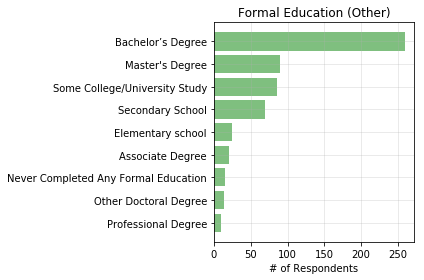

Total Formal Education responses: 586


,Labels,Values,% of Respondents
Bachelor’s Degree,Bachelor’s Degree,259,44.20
Master's Degree,Master's Degree,90,15.36
Some College/University Study,Some College/University Study,85,14.51
Secondary School,Secondary School,70,11.95
Elementary school,Elementary school,24,4.10
Associate Degree,Associate Degree,20,3.41
Never Completed Any Formal Education,Never Completed Any Formal Education,15,2.56
Other Doctoral Degree,Other Doctoral Degree,14,2.39
Professional Degree,Professional Degree,9,1.54


In [40]:
FE_Other_df_temp = FE_Gender_df.loc[FE_Gender_df["Gender"]=="Other / Non-Disclosed",:]
FE_Other_df = FE_Other_df_temp.dropna()

FE_Other_df_count = FE_Other_df['FormalEducation'].value_counts()
Per_Other = round(((FE_Other_df_count/FE_Other_df_count.sum())*100),2)


FE_Other_df = pd.DataFrame({'Labels' : FE_Other_df_count.index,
                            'Values' : FE_Other_df_count.values,
                            "% of Respondents" : Per_Other
})

plt.barh(FE_Other_df['Labels'],FE_Other_df['Values'], color='green', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Formal Education (Other)")
plt.xlabel("# of Respondents")
plt.tight_layout()
# plt.savefig("Images/Formal_Education_Other.png")
plt.show()

print(f"Total Formal Education responses: {FE_Other_df_count.sum()}")

FE_Other_df

<function matplotlib.pyplot.show(*args, **kw)>

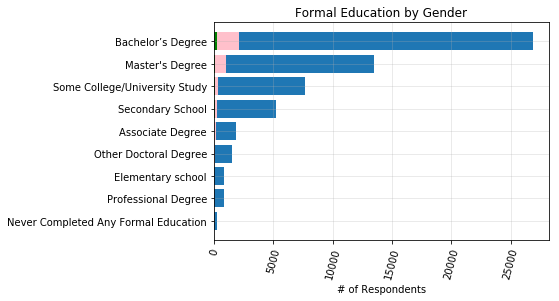

In [41]:
plt.barh(FE_Male_df['Labels'],FE_Male_df['Male_Values'])
plt.barh(FE_Female_df['Labels'],FE_Female_df['Female_Values'],color="pink")
plt.barh(FE_Other_df['Labels'],FE_Other_df['Values'],color="green")
plt.grid(alpha = 0.33)
plt.gca().invert_yaxis()
plt.xticks(rotation=75)
plt.title("Formal Education by Gender")
plt.xlabel("# of Respondents")
# plt.savefig("Images/Formal_Education_by_gender_all.png")

plt.show

# UnderGraduate_Majors

In [46]:
Under_Gender_df_temp = Education_df.loc[:,["UndergradMajor","Gender","Respondent"]]
Under_Gender_df = Under_Gender_df_temp.dropna()
Under_Gender_df["UndergradMajor"].count()

Under_Gender_df.head()

,UndergradMajor,Gender,Respondent
0,Mathematics or statistics,Male,1
1,Natural Science,Male,3
3,Computer Science/Computer Engineering,Male,5
4,Computer Science/Computer Engineering,Male,7
5,Computer Science/Computer Engineering,Male,8


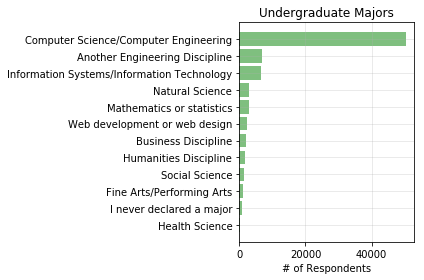

Total Undergraduate Major responses: 79036


,Labels,Values,% of Respondents
Computer Science/Computer Engineering,Computer Science/Computer Engineering,50336,63.69
Another Engineering Discipline,Another Engineering Discipline,6945,8.79
Information Systems/Information Technology,Information Systems/Information Technology,6507,8.23
Natural Science,Natural Science,3050,3.86
Mathematics or statistics,Mathematics or statistics,2818,3.57
Web development or web design,Web development or web design,2418,3.06
Business Discipline,Business Discipline,1921,2.43
Humanities Discipline,Humanities Discipline,1590,2.01
Social Science,Social Science,1377,1.74
Fine Arts/Performing Arts,Fine Arts/Performing Arts,1135,1.44


In [48]:
UndergradMajor_temp = Education_df[['Respondent','UndergradMajor']]
UndergradMajor = UndergradMajor_temp.dropna()

UndergradMajor_count = UndergradMajor['UndergradMajor'].value_counts()
Per_All = round(((UndergradMajor_count/UndergradMajor_count.sum())*100),2)

UndergradMajor_df = pd.DataFrame({'Labels' : UndergradMajor_count.index,
                            'Values' : UndergradMajor_count.values,
                                  '% of Respondents' : Per_All
})


plt.barh(UndergradMajor_df['Labels'], UndergradMajor_df['Values'], color='green', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Undergraduate Majors")
plt.xlabel("# of Respondents")
plt.tight_layout()
plt.savefig("../Images/Undergraduate_Majors.png")
plt.show()

print(f"Total Undergraduate Major responses: {UndergradMajor_count.sum()}")
UndergradMajor_df

# Salary & Career Satisfaction Analysis

In [4]:
#Exploring the different additional non-formal education types respondents took. Listing top 10 largest responses. 

temp = Data_Files[['Respondent', 'EducationTypes']].dropna()

temp['EducationTypes'].value_counts().nlargest(10)

Taught yourself a new language, framework, or tool without taking a formal course                                                                                                                                                                 6900
Taken an online course in programming or software development (e.g. a MOOC);Taught yourself a new language, framework, or tool without taking a formal course                                                                                     4509
Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software                                                                                                                             4082
Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course                                                                                                            2375
Taken an onl

* The question is 'select all that apply' 
* Need to split to count the responses
* Cannot simply replace like gender, multiple programs for every respondent

In [8]:
extra_education = pd.Series([item.strip() for sublist in temp['EducationTypes'].str.split(';') for item in sublist]).value_counts()

extra_education = pd.DataFrame(extra_education)

print(f"Total Respondents: {temp['EducationTypes'].count()}")
print(extra_education.sum())

extra_education

Total Respondents: 67960
0    206422
dtype: int64


,0
"Taught yourself a new language, framework, or tool without taking a formal course",58891
Taken an online course in programming or software development (e.g. a MOOC),33032
Contributed to open source software,27800
Received on-the-job training in software development,23849
Participated in a hackathon,17872
"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",16528
Taken a part-time in-person course in programming or software development,12131
Completed an industry certification program (e.g. MCPD),9332
Participated in a full-time developer training program or bootcamp,6987


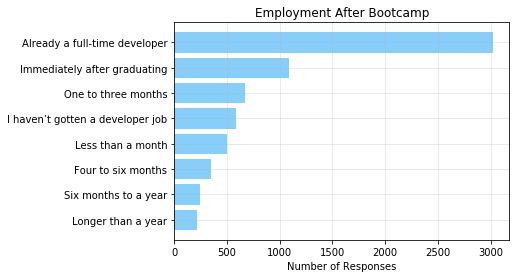

Total TimeAfterBootcamp responses: 6652


,Labels,Values,Percentage
0,Already a full-time developer,"3,025",45.48%
1,Immediately after graduating,"1,085",16.31%
2,One to three months,668,10.04%
3,I haven’t gotten a developer job,581,8.73%
4,Less than a month,496,7.46%
5,Four to six months,347,5.22%
6,Six months to a year,239,3.59%
7,Longer than a year,211,3.17%


In [10]:
#Exploring employment after participating in a bootcamp

temp = Data_Files[['TimeAfterBootcamp']].dropna()

bootcamp_vcounts = temp['TimeAfterBootcamp'].value_counts()

bootcamp_df = pd.DataFrame({'Labels' : bootcamp_vcounts.index,
                            'Values' : bootcamp_vcounts.values   
})

bootcamp_df['Labels'] = bootcamp_df['Labels'].replace({"I already had a full-time job as a developer when I began the program": "Already a full-time developer"})

bar = plt.barh(bootcamp_df['Labels'], bootcamp_df['Values'], color='lightskyblue', align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Employment After Bootcamp")
plt.xlabel("Number of Responses")
plt.savefig("../Images/Employment After Bootcamp.png", bbox_inches = "tight")

plt.show()

print(f"Total TimeAfterBootcamp responses: {bootcamp_vcounts.sum()}")

bootcamp_df['Percentage'] = bootcamp_df['Values'] / bootcamp_df['Values'].sum()

bootcamp_df = bootcamp_df.style.format({'Values' : '{:,}', 
                                        'Percentage' : '{:,.2%}'
})

bootcamp_df

In [11]:
#Preview of reported salary

temp = Data_Files[['Salary','SalaryType','CurrencySymbol', 'ConvertedSalary']]

temp.head(10)

,Salary,SalaryType,CurrencySymbol,ConvertedSalary
0,NaN,Monthly,KES,NaN
1,51000,Yearly,GBP,70841.0
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,260000,Yearly,ZAR,21426.0
5,30000,NaN,GBP,41671.0
6,120000,Yearly,USD,120000.0
7,NaN,NaN,NaN,NaN
8,250000,Yearly,USD,250000.0
9,NaN,NaN,NaN,NaN


* Exploring the data further, there seemed to be a lot of troublesome currency conversion
* Some had not converted into USD, some did not answer after answering Salary, same copy pasted their monthly/weekly non-US salary, etc.

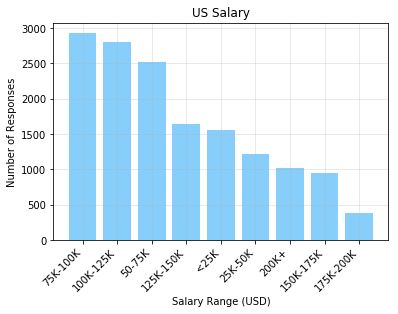

# of US salary responses: 15017
Average US Salary is: $95780.86
Median US Salary is: $55075.0


,Labels,Values,Percentage
0,75K-100K,"2,930",19.51%
1,100K-125K,"2,801",18.65%
2,50-75K,"2,514",16.74%
3,125K-150K,"1,648",10.97%
4,<25K,"1,557",10.37%
5,25K-50K,"1,214",8.08%
6,200K+,"1,023",6.81%
7,150K-175K,949,6.32%
8,175K-200K,381,2.54%


In [13]:
#Bins for salary ranges

salary_bins = [-1,24999,49999,74999,99999,124999,149999,174999,199999,50000000]
salary_ranges = ["<25K","25K-50K","50-75K","75K-100K","100K-125K","125K-150K","150K-175K","175K-200K","200K+"]


#US SALARY PLOTTING

conv_salary = Data_Files[['CurrencySymbol', 'ConvertedSalary']]

conv_salary_usd = conv_salary[conv_salary['CurrencySymbol'] == 'USD']
conv_salary_usd = conv_salary_usd[conv_salary_usd['ConvertedSalary'] != 0].dropna()

conv_salary_usd['salary_range'] = pd.cut(conv_salary_usd['ConvertedSalary'], salary_bins, labels = salary_ranges)

conv_salary_usd_vcounts = conv_salary_usd['salary_range'].value_counts()

salary_usd_df = pd.DataFrame({'Labels' : conv_salary_usd_vcounts.index,
                              'Values' : conv_salary_usd_vcounts.values 
})

plt.bar(salary_usd_df['Labels'], salary_usd_df['Values'], color='lightskyblue', align="center")
plt.grid(alpha = 0.33)
plt.title("US Salary")
plt.xlabel("Salary Range (USD)")
plt.xticks(rotation=45, ha = "right")
plt.ylabel("Number of Responses")
plt.savefig("../Images/US Salary.png", bbox_inches = "tight")

plt.show()

print(f"# of US salary responses: {conv_salary_usd_vcounts.sum()}")
print(f"Average US Salary is: ${round(conv_salary['ConvertedSalary'].mean(), 2)}")
print(f"Median US Salary is: ${round(conv_salary['ConvertedSalary'].median(), 2)}")

salary_usd_df['Percentage'] = salary_usd_df['Values'] / salary_usd_df['Values'].sum()

salary_usd_df = salary_usd_df.style.format({'Values' : '{:,}', 
                                            'Percentage' : '{:,.2%}'
})

salary_usd_df

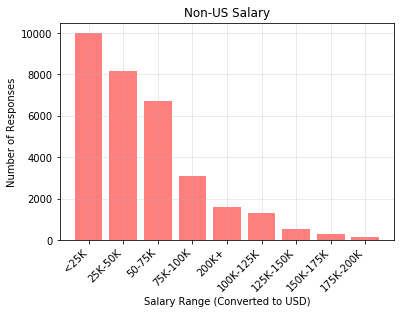

# of non-US salary responses: 31843
Average Non-US Converted Salary is: $76534.6
Median Non-US Converted Salary is: $43560.0


,Labels,Values,Percentage
0,<25K,"10,004",31.42%
1,25K-50K,"8,169",25.65%
2,50-75K,"6,698",21.03%
3,75K-100K,"3,107",9.76%
4,200K+,"1,589",4.99%
5,100K-125K,"1,305",4.10%
6,125K-150K,544,1.71%
7,150K-175K,283,0.89%
8,175K-200K,144,0.45%


In [15]:
#NON US SALARY PLOTTING

conv_salary_no_us = conv_salary[conv_salary['CurrencySymbol'] != 'USD']
conv_salary_no_us = conv_salary_no_us[conv_salary_no_us['ConvertedSalary'] != 0].dropna()

conv_salary_no_us['salary_range'] = pd.cut(conv_salary_no_us['ConvertedSalary'],salary_bins, labels = salary_ranges)

conv_salary_no_us_vcounts = conv_salary_no_us['salary_range'].value_counts()

salary_no_us_df = pd.DataFrame({'Labels' : conv_salary_no_us_vcounts.index,
                              'Values' : conv_salary_no_us_vcounts.values 
})

plt.bar(salary_no_us_df['Labels'], salary_no_us_df['Values'], color='r', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Non-US Salary")
plt.xlabel("Salary Range (Converted to USD)")
plt.xticks(rotation=45, ha = "right")
plt.ylabel("Number of Responses")
plt.savefig("../Images/Non-US Salary.png", bbox_inches = "tight")

plt.show()

print(f"# of non-US salary responses: {conv_salary_no_us_vcounts.sum()}")
print(f"Average Non-US Converted Salary is: ${round(conv_salary_no_us['ConvertedSalary'].mean(), 2)}")
print(f"Median Non-US Converted Salary is: ${round(conv_salary_no_us['ConvertedSalary'].median(), 2)}")

salary_no_us_df['Percentage'] = salary_no_us_df['Values'] / salary_no_us_df['Values'].sum()

salary_no_us_df = salary_no_us_df.style.format({'Values' : '{:,}', 
                                                'Percentage' : '{:,.2%}'
})

salary_no_us_df

In [16]:
#T Test between US and Non-US Salaries, is the Non-US data reliable?

non_us_salary = conv_salary_no_us['ConvertedSalary']
us_salary = conv_salary_usd['ConvertedSalary']

(t_salary, p_salary) = stats.ttest_ind(non_us_salary, us_salary, equal_var=False)

print("T-stat is: {}.".format(t_salary))
print("P-value is: {}.".format(p_salary))

T-stat is: -26.756215218863325.
P-value is: 7.374040531539123e-155.


* The P Value is very small between the two salary groups, null is rejected. 
* Any comparison with salary will be US based

In [17]:
# ANOVA TESTING : US Bootcamp & US Salary

bootcamp_salary = Data_Files[['Respondent', 'EducationTypes','CurrencySymbol', 'ConvertedSalary']]

bootcamp_salary.EducationTypes.fillna(2,inplace=True)
bootcamp_salary["EducationTypes"]=bootcamp_salary["EducationTypes"].apply(lambda x: 1 if x!=2 else 2)

bootcamp_salary = bootcamp_salary[bootcamp_salary['CurrencySymbol'] == 'USD']
bootcamp_salary = bootcamp_salary[bootcamp_salary['ConvertedSalary'] != 0].dropna()

group1 = bootcamp_salary[bootcamp_salary['EducationTypes'] == 1]['ConvertedSalary']
group2 = bootcamp_salary[bootcamp_salary['EducationTypes'] == 2]['ConvertedSalary']

print(f"Additional Learning vs. Salary: {stats.f_oneway(group1, group2)}")

bootcamp_salary_groupby = bootcamp_salary.groupby('EducationTypes')
bootcamp_salary_groupby['ConvertedSalary'].describe()

Additional Learning vs. Salary: F_onewayResult(statistic=0.12016845999418452, pvalue=0.7288567106403009)


C:\Users\Peter\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,mean,std,min,25%,50%,75%,max
EducationTypes,,,,,,,,
1,14653.0,142087.789531,280099.416243,1.0,60000.0,92000.0,125000.0,2000000.0
2,364.0,136909.192308,334529.209678,1.0,21450.0,60625.0,101425.0,2000000.0


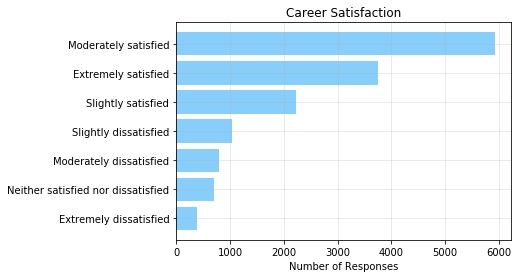

,Labels,Values,Percentage
0,Moderately satisfied,"5,933",39.96%
1,Extremely satisfied,"3,760",25.33%
2,Slightly satisfied,"2,228",15.01%
3,Slightly dissatisfied,"1,038",6.99%
4,Moderately dissatisfied,788,5.31%
5,Neither satisfied nor dissatisfied,705,4.75%
6,Extremely dissatisfied,394,2.65%


In [22]:
#US Salary & US Career Satisfaction

us_satisfaction_df = Data_Files[['CurrencySymbol', 'ConvertedSalary','CareerSatisfaction']]

us_satisfaction_df = us_satisfaction_df[us_satisfaction_df['CurrencySymbol'] == 'USD'].dropna()
us_satisfaction_df = us_satisfaction_df[us_satisfaction_df['ConvertedSalary'] != 0]

us_satisfaction_vcounts = us_satisfaction_df['CareerSatisfaction'].value_counts()

satisfaction_vcounts_df = pd.DataFrame({'Labels' : us_satisfaction_vcounts.index,
                                        'Values' : us_satisfaction_vcounts.values   
})

plt.barh(satisfaction_vcounts_df['Labels'], satisfaction_vcounts_df['Values'], color='lightskyblue', align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Career Satisfaction")
plt.xlabel("Number of Responses")
plt.savefig("../Images/Career Satisfaction.png", bbox_inches = "tight")

plt.show()

satisfaction_vcounts_df['Percentage'] = satisfaction_vcounts_df['Values'] / satisfaction_vcounts_df['Values'].sum()

satisfaction_vcounts_df = satisfaction_vcounts_df.style.format({'Values' : '{:,}', 
                                                                'Percentage' : '{:,.2%}'
})

satisfaction_vcounts_df

In [23]:
#Binning US Salary and US Satisfaction for ANOVA testing

us_satisfaction_df['CareerSatisfaction'] = us_satisfaction_df['CareerSatisfaction'].replace({"Extremely satisfied" : 7,
                                                                                             "Moderately satisfied" : 6,
                                                                                             "Slightly satisfied" : 5, 
                                                                                             "Neither satisfied nor dissatisfied" : 4,
                                                                                             "Slightly dissatisfied" : 3, 
                                                                                             "Moderately dissatisfied" : 2,
                                                                                             "Extremely dissatisfied" : 1
})

us_satisfaction_df['salary_range'] = pd.cut(us_satisfaction_df['ConvertedSalary'],salary_bins, labels = salary_ranges)

us_satisfaction_df['salary_range'] = us_satisfaction_df['salary_range'].replace({"<25K" : 1,
                                                                                 "25K-50K" : 2,
                                                                                 "50-75K" : 3,
                                                                                 "75K-100K" : 4,
                                                                                 "100K-125K" : 5,
                                                                                 "125K-150K" : 6,
                                                                                 "150K-175K" : 7,
                                                                                 "175K-200K" : 8,
                                                                                 "200K+": 9
})

us_satisfaction_df.head()

,CurrencySymbol,ConvertedSalary,CareerSatisfaction,salary_range
6,USD,120000.0,6,5
8,USD,250000.0,6,9
23,USD,75000.0,3,4
27,USD,900000.0,6,9
32,USD,44000.0,6,2


In [24]:
#Summary of Career Satisfaction Rating & Salary Stats

us_satisfaction_groupby = us_satisfaction_df.groupby('CareerSatisfaction')
us_satisfaction_groupby['ConvertedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
CareerSatisfaction,,,,,,,,
1,394.0,150239.677665,328940.188080,48.0,33375.0,84000.0,131500.0,2000000.0
2,788.0,120341.153553,254092.191474,120.0,44850.0,76648.0,110000.0,2000000.0
3,1038.0,144559.526975,322556.916002,1.0,50000.0,80000.0,115000.0,2000000.0
4,705.0,125502.293617,286439.417139,50.0,36000.0,75000.0,105000.0,2000000.0
5,2228.0,135447.566427,293340.689509,5.0,54000.0,84000.0,120000.0,2000000.0
6,5933.0,144850.917580,270365.675668,12.0,67000.0,96000.0,130000.0,2000000.0
7,3760.0,150525.389628,281254.519738,12.0,70000.0,100000.0,135000.0,2000000.0


In [25]:
#US Salary & Satisfaction ANOVA

group1 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 1]['CareerSatisfaction']
group2 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 2]['CareerSatisfaction']
group3 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 3]['CareerSatisfaction']
group4 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 4]['CareerSatisfaction']
group5 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 5]['CareerSatisfaction']
group6 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 6]['CareerSatisfaction']
group7 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 7]['CareerSatisfaction']
group8 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 8]['CareerSatisfaction']
group9 = us_satisfaction_df[us_satisfaction_df['salary_range'] == 9]['CareerSatisfaction']

print(f"Salary vs. Satisfaction: {stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9)}")

Salary vs. Satisfaction: F_onewayResult(statistic=50.259005007417045, pvalue=9.055286781403873e-81)


In [26]:
# ANOVA TESTING : SATISFACTION & GENDER (ALL)

gender_satisfaction_df = Data_Files[['Country','Gender', 'CareerSatisfaction']]

gender_satisfaction_df["Gender"]=gender_satisfaction_df["Gender"].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})

gender_satisfaction_df = gender_satisfaction_df[gender_satisfaction_df['Country'] != 'United States']


gender_satisfaction_df = gender_satisfaction_df.dropna()
gender_satisfaction_df

gender_satisfaction_df['Gender'] = gender_satisfaction_df['Gender'].replace({"Male" : 1,
                                                                             "Female" : 2,
                                                                             "Other / Non-Disclosed" : 3
})

gender_satisfaction_df['CareerSatisfaction'] = gender_satisfaction_df['CareerSatisfaction'].replace({"Extremely satisfied" : 7,
                                                                                             "Moderately satisfied" : 6,
                                                                                             "Slightly satisfied" : 5, 
                                                                                             "Neither satisfied nor dissatisfied" : 4,
                                                                                             "Slightly dissatisfied" : 3, 
                                                                                             "Moderately dissatisfied" : 2,
                                                                                             "Extremely dissatisfied" : 1
})


group1 = gender_satisfaction_df[gender_satisfaction_df['Gender'] == 1]['CareerSatisfaction']
group2 = gender_satisfaction_df[gender_satisfaction_df['Gender'] == 2]['CareerSatisfaction']
group3 = gender_satisfaction_df[gender_satisfaction_df['Gender'] == 3]['CareerSatisfaction']


print(f"Gender vs. Satisfaction (ALL): {stats.f_oneway(group1, group2, group3)}")

gender_groupby = gender_satisfaction_df.groupby('Gender')
gender_groupby['CareerSatisfaction'].describe()

Gender vs. Satisfaction (ALL): F_onewayResult(statistic=21.45364230044914, pvalue=4.865837081050561e-10)


C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,42901.0,5.098296,1.627306,1.0,4.0,6.0,6.0,7.0
2,2566.0,5.000390,1.688512,1.0,4.0,6.0,6.0,7.0
3,395.0,4.610127,1.874190,1.0,3.0,5.0,6.0,7.0


In [27]:
# ANOVA TESTING : SATISFACTION & GENDER (US)

gender_satisfaction_us_df = Data_Files[['Country','Gender', 'CareerSatisfaction']]

gender_satisfaction_us_df["Gender"]=gender_satisfaction_us_df["Gender"].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})

gender_satisfaction_us_df = gender_satisfaction_us_df[gender_satisfaction_us_df['Country'] == 'United States'].dropna()


gender_satisfaction_us_df['Gender'] = gender_satisfaction_us_df['Gender'].replace({"Male" : 1,
                                                                             "Female" : 2,
                                                                             "Other / Non-Disclosed" : 3
})

gender_satisfaction_us_df['CareerSatisfaction'] = gender_satisfaction_us_df['CareerSatisfaction'].replace({"Extremely satisfied" : 7,
                                                                                             "Moderately satisfied" : 6,
                                                                                             "Slightly satisfied" : 5, 
                                                                                             "Neither satisfied nor dissatisfied" : 4,
                                                                                             "Slightly dissatisfied" : 3, 
                                                                                             "Moderately dissatisfied" : 2,
                                                                                             "Extremely dissatisfied" : 1
})


group1 = gender_satisfaction_us_df[gender_satisfaction_us_df['Gender'] == 1]['CareerSatisfaction']
group2 = gender_satisfaction_us_df[gender_satisfaction_us_df['Gender'] == 2]['CareerSatisfaction']
group3 = gender_satisfaction_us_df[gender_satisfaction_us_df['Gender'] == 3]['CareerSatisfaction']

print(f"Gender vs. Satisfaction (US): {stats.f_oneway(group1, group2, group3)}")

gender_groupby_us = gender_satisfaction_us_df.groupby('Gender')
gender_groupby_us['CareerSatisfaction'].describe()

Gender vs. Satisfaction (US): F_onewayResult(statistic=2.458735111052797, pvalue=0.08557845414366759)


C:\Users\Peter\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,13171.0,5.480601,1.539256,1.0,5.0,6.0,7.0,7.0
2,1300.0,5.382308,1.554995,1.0,5.0,6.0,6.0,7.0
3,153.0,5.509804,1.396036,1.0,5.0,6.0,6.0,7.0


In [28]:
#T Test: Gender & Career Satisfaction (Non-US v. US)

non_us_gender_satisfaction = gender_satisfaction_df['CareerSatisfaction']
us_gender_satisfaction = gender_satisfaction_us_df['CareerSatisfaction']

(t_stat, p) = stats.ttest_ind(us_gender_satisfaction, non_us_gender_satisfaction, equal_var=False)

print("T-stat is: {}.".format(t_stat))
print("P-value is: {}.".format(p))

T-stat is: 25.844801480561618.
P-value is: 1.9304007108930356e-145.


In [54]:
# ANOVA TESTING : Gender & Salary (USD)

gender_salary = Data_Files[['Gender','CurrencySymbol', 'ConvertedSalary']]

gender_salary = gender_salary[gender_salary['CurrencySymbol'] == 'USD']
gender_salary = gender_salary[gender_salary['ConvertedSalary'] != 0].dropna()
#dropna?

gender_salary["Gender"]=gender_salary["Gender"].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})

gender_salary['Gender'] = gender_salary['Gender'].replace({"Male" : 1,
                                                           "Female" : 2,
                                                           "Other / Non-Disclosed" : 3
})

group1 = gender_salary[gender_salary['Gender'] == 1]['ConvertedSalary']
group2 = gender_salary[gender_salary['Gender'] == 2]['ConvertedSalary']
group3 = gender_salary[gender_salary['Gender'] == 3]['ConvertedSalary']

print(f"Gender vs. Salary (US): {stats.f_oneway(group1, group2, group3)}")

gender_salary_groupby = gender_salary.groupby('Gender')
gender_salary_groupby['ConvertedSalary'].describe()

Gender vs. Salary (US): F_onewayResult(statistic=2.510064082033512, pvalue=0.08129913256618808)


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
1,12849.0,142682.481127,280317.536060,1.0,60000.0,94000.0,127500.0,2000000.0
2,1177.0,123901.932880,238707.021125,60.0,60000.0,82500.0,115000.0,2000000.0
3,159.0,147838.075472,336685.994880,1650.0,41000.0,79000.0,115000.0,2000000.0


# Additional Calculations NOT Used in the Presentation

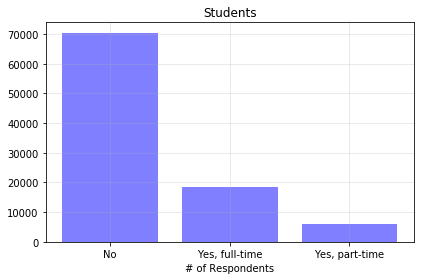

Total Student Responses: 94901


,Labels,Values,% of Respondents
No,No,70399,74.18
"Yes, full-time","Yes, full-time",18394,19.38
"Yes, part-time","Yes, part-time",6108,6.44


In [49]:
student_temp = Education_df[['Respondent','Student']]
student = student_temp.dropna()

student_count = student['Student'].value_counts()
Student_Per = round(((student_count/student_count.sum())*100),2)

student_df = pd.DataFrame({'Labels' : student_count.index,
                            'Values' : student_count.values,
                           "% of Respondents" : Student_Per
})


plt.bar(student_df['Labels'], student_df['Values'], color='blue', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Students")
plt.xlabel("# of Respondents")
plt.tight_layout()
# plt.savefig("Images/Students.png")
plt.show()

print(f"Total Student Responses: {student_count.sum()}")
student_df

<function matplotlib.pyplot.show(*args, **kw)>

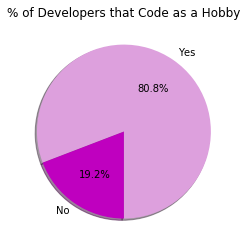

In [51]:
Hobby_Yes_df = Education_df.loc[Education_df["Hobby"] == "Yes", :]
Hobby_No_df = Education_df.loc[Education_df["Hobby"] == "No", :]
No_count = Hobby_No_df['Hobby'].count()
Yes_count = Hobby_Yes_df['Hobby'].count()

labels = ["Yes", "No"]

# The values of each section of the pie chart
sizes = [Yes_count, No_count]

# The colors of each section of the pie chart
colors = ["plum", "m"]

plt.pie(sizes, labels=labels, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=270, )
plt.title("% of Developers that Code as a Hobby")
# plt.savefig("Images/Hobby_Percentage.png")

plt.show

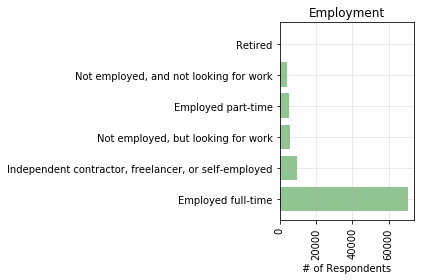

Total Employment Responses: 95321


,Labels,Values,% of Respondents
Employed full-time,Employed full-time,70495,73.96
"Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-em...",9282,9.74
"Not employed, but looking for work","Not employed, but looking for work",5805,6.09
Employed part-time,Employed part-time,5380,5.64
"Not employed, and not looking for work","Not employed, and not looking for work",4132,4.33
Retired,Retired,227,0.24


In [52]:
Employment_temp = Education_df[['Respondent','Employment']]
Employment = Employment_temp.dropna()

Employment_count = Employment['Employment'].value_counts()
Employment_Per = round(((Employment_count/Employment_count.sum())*100),2)

Employment_df = pd.DataFrame({'Labels' : Employment_count.index,
                            'Values' : Employment_count.values,
                              '% of Respondents' : Employment_Per
})


plt.barh(Employment_df['Labels'], Employment_df['Values'], color='forestgreen', alpha=0.5,align="center")
plt.grid(alpha = 0.33)
plt.title("Employment")
plt.xticks(rotation=90)
plt.xlabel("# of Respondents")
plt.tight_layout()
# plt.savefig("Images/Employment.png")
plt.show()

print(f"Total Employment Responses: {Employment_count.sum()}")
Employment_df

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


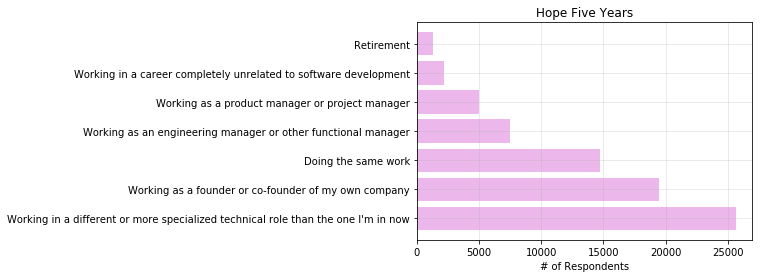

Total Hope Five Years Responses: 75718


,Labels,Values
0,Working in a different or more specialized tec...,25643
1,Working as a founder or co-founder of my own c...,19444
2,Doing the same work,14724
3,Working as an engineering manager or other fun...,7483
4,Working as a product manager or project manager,5004
5,Working in a career completely unrelated to so...,2151
6,Retirement,1269


In [53]:
HopeFiveYears_temp = Education_df[['Respondent','HopeFiveYears']]
HopeFiveYears = HopeFiveYears_temp.dropna()

HopeFiveYears_count = HopeFiveYears['HopeFiveYears'].value_counts()


HopeFiveYears_df = pd.DataFrame({'Labels' : HopeFiveYears_count.index,
                            'Values' : HopeFiveYears_count.values   
})


plt.barh(HopeFiveYears_df['Labels'], HopeFiveYears_df['Values'], color='orchid', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Hope Five Years")
plt.xlabel("# of Respondents")
plt.tight_layout()
# plt.savefig("Images/Hope_Five_Years.png")

plt.show()

print(f"Total Hope Five Years Responses: {HopeFiveYears_count.sum()}")
HopeFiveYears_df

In [30]:
# ANOVA: SATISFACTION & HOBBY (ALL)

hobby_satisfaction_df = Data_Files[['CurrencySymbol','Hobby', 'CareerSatisfaction']].dropna()

hobby_satisfaction_df['Hobby'] = hobby_satisfaction_df['Hobby'].replace({"Yes" : 1,
                                                                         "No" : 2
})


hobby_satisfaction_df['CareerSatisfaction'] = hobby_satisfaction_df['CareerSatisfaction'].replace({"Extremely satisfied" : 7,
                                                                                             "Moderately satisfied" : 6,
                                                                                             "Slightly satisfied" : 5, 
                                                                                             "Neither satisfied nor dissatisfied" : 4,
                                                                                             "Slightly dissatisfied" : 3, 
                                                                                             "Moderately dissatisfied" : 2,
                                                                                             "Extremely dissatisfied" : 1
})


group1 = hobby_satisfaction_df[hobby_satisfaction_df['Hobby'] == 1]['CareerSatisfaction']
group2 = hobby_satisfaction_df[hobby_satisfaction_df['Hobby'] == 2]['CareerSatisfaction']

print(f"Hobby vs. Satisfaction (ALL): {stats.f_oneway(group1, group2)}")

hobby_groupby = hobby_satisfaction_df.groupby('Hobby')
hobby_groupby['CareerSatisfaction'].describe()

Hobby vs. Satisfaction (ALL): F_onewayResult(statistic=133.14054565662877, pvalue=9.109272271469104e-31)


,count,mean,std,min,25%,50%,75%,max
Hobby,,,,,,,,
1,46660.0,5.220874,1.619708,1.0,5.0,6.0,6.0,7.0
2,10701.0,5.019905,1.647847,1.0,4.0,6.0,6.0,7.0


In [32]:
# ANOVA: SATISFACTION & HOBBY (US)

hobby_satisfaction_df = Data_Files[['CurrencySymbol','Hobby', 'CareerSatisfaction']]

hobby_satisfaction_df = hobby_satisfaction_df[hobby_satisfaction_df['CurrencySymbol'] == 'USD'].dropna()


hobby_satisfaction_df['Hobby'] = hobby_satisfaction_df['Hobby'].replace({"Yes" : 1,
                                                                         "No" : 2
})


hobby_satisfaction_df['CareerSatisfaction'] = hobby_satisfaction_df['CareerSatisfaction'].replace({"Extremely satisfied" : 7,
                                                                                             "Moderately satisfied" : 6,
                                                                                             "Slightly satisfied" : 5, 
                                                                                             "Neither satisfied nor dissatisfied" : 4,
                                                                                             "Slightly dissatisfied" : 3, 
                                                                                             "Moderately dissatisfied" : 2,
                                                                                             "Extremely dissatisfied" : 1
})

group1 = hobby_satisfaction_df[hobby_satisfaction_df['Hobby'] == 1]['CareerSatisfaction']
group2 = hobby_satisfaction_df[hobby_satisfaction_df['Hobby'] == 2]['CareerSatisfaction']

print(f"Hobby vs. Satisfaction (US): {stats.f_oneway(group1, group2)}")

hobby_groupby = hobby_satisfaction_df.groupby('Hobby')
hobby_groupby['CareerSatisfaction'].describe()

Hobby vs. Satisfaction (US): F_onewayResult(statistic=27.76174404037053, pvalue=1.3888958661222893e-07)


,count,mean,std,min,25%,50%,75%,max
Hobby,,,,,,,,
1,13795.0,5.423487,1.591900,1.0,5.0,6.0,7.0,7.0
2,3178.0,5.257709,1.629707,1.0,5.0,6.0,6.0,7.0
